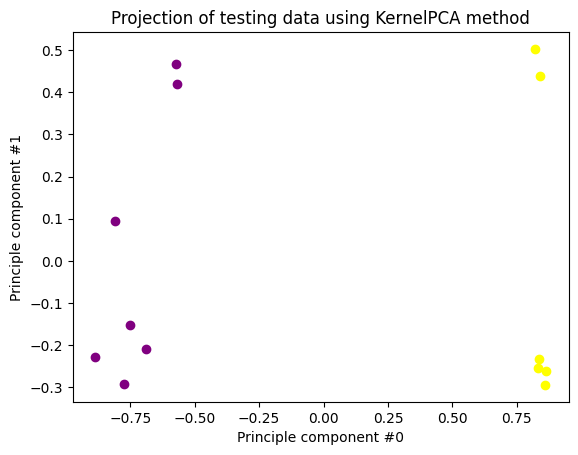

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def kernel_function(x, y):
    return np.exp(-5*(np.linalg.norm(x-y)**2))

def compute_kernel_matrix(data, kernel_func):
    n = len(data)
    K = np.zeros((n, n))  
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel_func(data[i], data[j])
    return K

X = np.array([[-0.5, -0.9],
        [0.2, 1],
        [-0.9, -0.3],
        [0.2, 0],
        [1, 0],
        [-0.1, 0.2],
        [0, 0.2],
        [-0.5, 0.9],
        [0.8, -0.6],
        [-0.1, -0.2],
        [0.1, 0.1],
        [-0.2, -0.1],
        [0.1, -0.1]])

K = compute_kernel_matrix(X, kernel_function)

n = K.shape[0]
one_n = np.ones((n, n)) / n
K_centered = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(one_n, np.dot(K, one_n))

eigvals, eigvecs = np.linalg.eigh(K_centered)
idx = np.argsort(eigvals)[::-1]
eigvecs_selected = eigvecs[:, idx][:, :2]

X_pca = np.dot(K_centered, eigvecs_selected)

x = X_pca[:, 0]
y = X_pca[:, 1]  
right_data = X_pca[x > 0]
left_data = X_pca[x <= 0]
plt.scatter(right_data[:, 0], right_data[:, 1], c='yellow', label='Right')

plt.scatter(left_data[:, 0], left_data[:, 1], c='purple', label='Left')
plt.legend
plt.xlabel('Principle component #0')
plt.ylabel('Principle component #1')
plt.title('Projection of testing data using KernelPCA method')
plt.show()

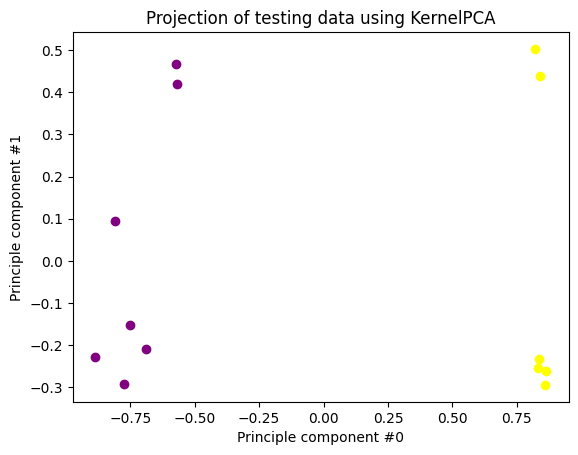

In [ ]:
import numpy as np

def kernel_pca(data, n_components, gamma):
    # 计算核矩阵
    K = np.exp(-gamma * np.linalg.norm(data[:, np.newaxis] - data[np.newaxis, :], axis=2) ** 2)
    
    # 中心化核矩阵
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # 计算特征值和特征向量
    eigvals, eigvecs = np.linalg.eigh(K_centered)
    
    # 选择前n_components个特征向量
    idx = np.argsort(eigvals)[::-1]
    eigvecs_selected = eigvecs[:, idx][:, :n_components]
    
    # 计算投影数据
    projected_data = K_centered.dot(eigvecs_selected)
    
    return projected_data

# 原始数据
data = np.array([[-0.5, -0.9],
        [0.2, 1],
        [-0.9, -0.3],
        [0.2, 0],
        [1, 0],
        [-0.1, 0.2],
        [0, 0.2],
        [-0.5, 0.9],
        [0.8, -0.6],
        [-0.1, -0.2],
        [0.1, 0.1],
        [-0.2, -0.1],
        [0.1, -0.1]])

# 设置参数
n_components = 2
gamma = 5

# 进行核PCA投影
X_pca = kernel_pca(data, n_components, gamma)

# 打印投影后的数据
x = X_pca[:, 0] 
y = X_pca[:, 1]  
right_data = X_pca[x > 0]
left_data = X_pca[x <= 0]
plt.scatter(right_data[:, 0], right_data[:, 1], c='yellow', label='Right')

plt.scatter(left_data[:, 0], left_data[:, 1], c='purple', label='Left')
plt.legend
plt.xlabel('Principle component #0')
plt.ylabel('Principle component #1')
plt.title('Projection of testing data using KernelPCA')
plt.show()

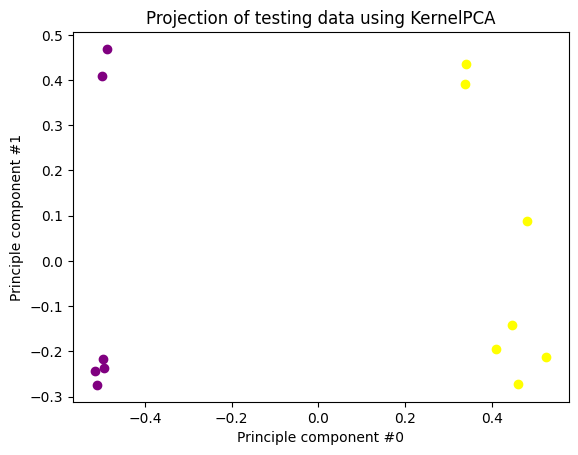

In [ ]:
import numpy as np
from sklearn.decomposition import KernelPCA

# 原始数据
data = np.array([[-0.5, -0.9],
        [0.2, 1],
        [-0.9, -0.3],
        [0.2, 0],
        [1, 0],
        [-0.1, 0.2],
        [0, 0.2],
        [-0.5, 0.9],
        [0.8, -0.6],
        [-0.1, -0.2],
        [0.1, 0.1],
        [-0.2, -0.1],
        [0.1, -0.1]])

# 创建Kernel PCA对象
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5)

# 进行数据投影
X_pca = kpca.fit_transform(data)

# 打印投影后的数据

x = X_pca[:, 0] 
y = X_pca[:, 1]  
right_data = X_pca[x > 0]
left_data = X_pca[x <= 0]
plt.scatter(right_data[:, 0], right_data[:, 1], c='yellow', label='Right')

plt.scatter(left_data[:, 0], left_data[:, 1], c='purple', label='Left')
plt.legend
plt.xlabel('Principle component #0')
plt.ylabel('Principle component #1')
plt.title('Projection of testing data using KernelPCA')
plt.show()